In [19]:
!pip install pdf

     |████████████████████████████████| 56 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 5.0 MB/s eta 0:00:01     |███████████████████             | 3.3 MB 5.0 MB/s eta 0:00:01     |███████████████████████▉        | 4.2 MB 5.0 MB/s eta 0:00:01     |██████████████████████████████▊ | 5.4 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████▏   | 71 kB 2.6 MB/s eta 0:00:01     |████████████████████████████████| 81 kB 2.7 MB/s 
     |████████████████████████████████| 44 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 3.9 MB/s eta 0:00:01


     |████████████████████████████████| 2.0 MB 102 kB/s eta 0:00:01
     |████████████████████████████████| 176 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 2.7 MB/s eta 0:00:01
  Using cached pycparser-2.20-py2.py3-none-any.whl (112 kB)
     |████████████████████████████████| 45 kB 2.2 MB/s eta 0:00:01
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140090 sha256=c3aa683c7b9cbcdbc38d155de1d3c9f2eed5df5e0a726d737eb4e06fa2b16c8f
  Stored in directory: /Users/jairneto/Library/Caches/pip/wheels/1c/28/7d/f390b82bb0307deb63ff27a1474fd308ec68ee028cb9ab6283


  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=905b07bd3f6f717e4d261bac06088051a2910fef9e4ed2c06d1bdcf6b1478ea8
  Stored in directory: /Users/jairneto/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4360 sha256=ddcb3471be43bf13fffb2c087a1cad19b6b1065bfeb179ae7e89e0db0d7e69b2
  Stored in directory: /Users/jairneto/Library/Caches/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15078 sha256=9ae06d8a414f1178c4a21ead809312e415209670419bbcf21a7bf87cc88dc6ff
  Stored in directory: /Users/jairneto/Library/Caches/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
  Created wheel for base32hex: filename=base32hex-1.0.2-py3-none-any.whl size=2270 sha256=bfceb224f6e1eb9fbdf4e0b99b4bd9146c0b9f3575f6587a10389ec60b7a069c


In [ ]:
!pip install tika

In [22]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 924 kB/s eta 0:00:01
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61086 sha256=7367ca8c10eb8d01db96468c550fc41d17f2e6ed24cc4dec75c9ea27ebcf169d
  Stored in directory: /Users/jairneto/Library/Caches/pip/wheels/b1/1a/8f/a4c34be976825a2f7948d0fa40907598d69834f8ab5889de11
Successfully built PyPDF2
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
!pip install beautifulsoup4

     |████████████████████████████████| 115 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tika import parser
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pickle



nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])

[nltk_data] Downloading package punkt to /Users/jairneto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jairneto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jairneto/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jairneto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def get_text_from_html(url, tags_to_ignore=["script", "style"]):
    text = ''
    try:
        html = urlopen(url).read()
        soup = BeautifulSoup(html, features="html.parser")
        for script in soup(tags_to_ignore):
            script.extract()    # rip it out

        # get text
        text = soup.get_text()

        # break into lines and remove leading and trailing space on each
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)
    except:
        print(f'Could not open the url {url}')
    
    return text

In [3]:
def get_text_from_pdf(path):
    text = ''
    try:
        raw = parser.from_file(path)
        text = raw['content']
    except:
        print(f'Could not open the path {path}')

    return text

In [4]:
def get_letters_corpus_dict(letters_pdf_path, init_year=1977, end_year=2020):
    if init_year < 1977 or end_year > 2020:
        print('The range supported is between 1977 and 2020')
        return {}

    letters_dict = dict()
    letters_years = [year for year in range(init_year, end_year + 1)]
    for year in letters_years:
        if year >= 2000:
            filename = f'{year}ltr.pdf'
            path = Path(letters_pdf_path).joinpath(filename)
            letter_corpus = get_text_from_pdf(str(path))
        else:
            if 1997 < year:
                url = f'https://www.berkshirehathaway.com/letters/{year}htm.html'
            else:
                url = f'https://www.berkshirehathaway.com/letters/{year}.html'
            letter_corpus = get_text_from_html(url)

        letters_dict[year] = letter_corpus
    
    return letters_dict

In [50]:
letters_dict = get_letters_corpus_dict('/Users/jairneto/Downloads/')

Could not open the path /Users/jairneto/Downloads/2000ltr.pdf
Could not open the path /Users/jairneto/Downloads/2001ltr.pdf
Could not open the path /Users/jairneto/Downloads/2002ltr.pdf


In [126]:
with open('letters_dict.pickle', 'wb') as handle:
    pickle.dump(letters_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('letters_dict.pickle', 'rb') as handle:
    letters_dict = pickle.load(handle)

In [7]:
def tokenize(text, freq_words=[]):
    """Tokenize the text

    Parameters
    ----------
    text: String
        The message to be tokenized
    freq_words: List
        List with words that appears frequent at the text

    Returns
    -------
    List
        List with the clean tokens
    """
    #TODO tem que tirar as frequent words
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    tokens = [w for w in tokens if w not in frequent_words_list]

    lemmatizer = WordNetLemmatizer()

    clean_tokens_list = []
    for tok in tokens:
        lemmatizer_tok = lemmatizer.lemmatize(tok).strip()
        clean_tokens_list.append(lemmatizer_tok)

    return clean_tokens_list

In [ ]:
frequent_words_list = ['year', 'business', 'berkshire', 'million', 'company', 'u',
                       'billion', 'tax', 'investment', 'share', 'last', 'value',
                       'would', 'many', 'operation', 'market', 'one', 'large', 'p',
                       'make', 'asset', 'also', 'see', 'even', 'well', 'two', 'made',
                       'pre', 'return', 'cost', 'capital', 'may', 'price', 'per', 'first',
                       'annual', 'though', 'however', 'time',
                       'manager', 'money', 'dollar', 'meeting',
                       'interest', 'great', 'group', 'come', 'far',
                       'long', 'worth', 'net', 'report', 'industry', 'put',
                       'contract', 'must', 'yearend', 'day', 'major', 'real', 'since',
                       'let', 'need', 'record', 'good', 'country', 'america', 'period',
                       'average', 'increased', 'home', 'run', 'way',
                       'world', 'second', 'four', 'product', 'largest', 'certain',
                       'financial', 'three',
                       'ago', 'almost', 'american',
                       'amount', 'area', 'b',
                       'believe', 'better', 'blue', 'board',
                       'book', 'borrower', 'brown', 'buffett', 'buyer',
                       'c', 'capacity', 'case', 'cash', 'casualty', 'cat', 'category',
                       'change', 'charge', 'chip', 'charlie',
                       'committee', 'common', 'controlled', 'corporate',
                       'corporation', 'could', 'coupon', 'customer', 'debt',
                       'director',
                       'every',
                       'fee', 'figure', 'find', 'five', 'float',
                       'fund', 'g',
                       'general', 'get', 'give', 'goodwill',
                       'h', 'hathaway', 'helper', 'high', 'holding',
                       'hour', 'housing', 'huge', 'important', 'inc', 'income',
                       'intrinsic',
                       'investor', 'k', 'know', 'le', 'like', 'line', 'look',
                       'low', 'management', 'medium', 'merger',
                       'mr', 'much', 'name', 'national', 'never',
                       'new', 'news', 'non', 'number', 'often', 'operating',
                       'others', 'owned', 'owner', 'ownership', 'page', 'paid',
                       'paper', 'past', 'pay', 'payment', 'people',
                       'preferred', 'premium',
                       'purchase', 'question',
                       'rather', 'ratio',
                       'reported', 'reserve', 'result', 'retained',
                       'rule', 'say',
                       'september', 'service', 'shoe',
                       'star', 'state', 'store', 'subsidiary', 'sunday', 'super',
                       'take', 'ten', 'th',
                       'therefore', 'utility', 'volume',
                       'zero']

In [127]:
## Create a document-term matrix with CountVectorizer
df_letters = None
for k in letters_dict:
    count_v = CountVectorizer(tokenizer=tokenize)
    letter_X = count_v.fit_transform([letters_dict[k]]).toarray()
    if df_letters is None:
        df_letters = pd.DataFrame(letter_X, columns=count_v.get_feature_names(), index=[k])
    else:
        df_letters = df_letters.append(pd.DataFrame(letter_X, columns=count_v.get_feature_names(), index=[k]))

In [164]:
df_heat = None
df_filtered = df_letters.T.query(f"index not in {frequent_words_list}")
for col in df_filtered.columns:
    col = int(col)
    x = df_filtered.sort_values(col, ascending=False)[col]
    if df_heat is None:
        df_heat = x.to_frame()
        df_heat.columns = [col]
    else:
        df_heat[col] = x

In [72]:
df_filtered[2008].sort_values(ascending=False).dropna()

insurance     41.0
bond          36.0
loss          35.0
derivative    23.0
charlie       22.0
              ... 
passed         1.0
passing        1.0
patrick        1.0
performing     1.0
ability        1.0
Name: 2008, Length: 2168, dtype: float64

In [165]:
key_words = ['ceo', 'insurance', 'shareholder', 'gain', 'loss', 'stock', 'bond',
             'acquisition', 'portfolio', 'risk', 'sale',
             'discount', 'opportunity']
x = df_heat.loc[key_words].fillna(0)

Text(0.5, 33.0, 'Fiscal Period')

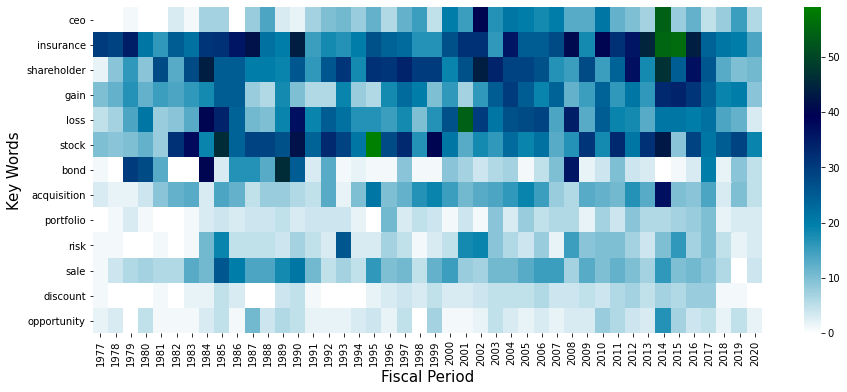

In [166]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.heatmap(x, cmap='ocean_r', annot=False)
ax.set_ylabel('Key Words', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)